## Book Recommendation

In recent years, online bookstores and reading platforms have become increasingly popular, allowing readers to discover new books and authors from the comfort of their own homes. However, with the sheer volume of books available, it can be challenging for readers to find books that match their interests and preferences. This is where book recommendation systems come in.

Unsupervised learning is a rapidly evolving field in machine learning that focuses on discovering patterns and structures in data without any prior knowledge or supervision. It has numerous applications in areas such as anomaly detection, clustering, dimensionality reduction, and generative modeling. In this project, we will be utilizing unsupervised learning to explore a dataset on books, tags and ratings and try to come up with a model that can take in a book title and list of some recommendations based on the title.

We will be utilizing the data from the kaggle website, specifically this link - https://www.kaggle.com/datasets/zygmunt/goodbooks-10k?datasetId=1938. There are a few csv files in this link regarding books and we will be taking a look at them. First we will do some exploratory data analysis on the csv files and based on our initila exploration, we can try to come up with some sort of recommendation model that can recommend a certain number of books based on what you have read. 

### Read in the data and EDA
We start by loading some libraries and reading in the data files. We wil be taking a look at the shape of the files and be doing some data cleaning.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [15]:
books=pd.read_csv("books.csv")
ratings=pd.read_csv("ratings.csv")
booktags = pd.read_csv('book_tags.csv')
tags = pd.read_csv('tags.csv')

books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [16]:
print(books.shape)
print(books.isnull().sum())

(10000, 23)
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64


Here we see that isbn, isbn13, original_publication_year, original_title and language_code have some null values. Since there are 10000 rows, we can drop or ignore these rows with null values.

In [18]:
books = books.dropna()
print(books.isnull().sum())

id                           0
book_id                      0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64


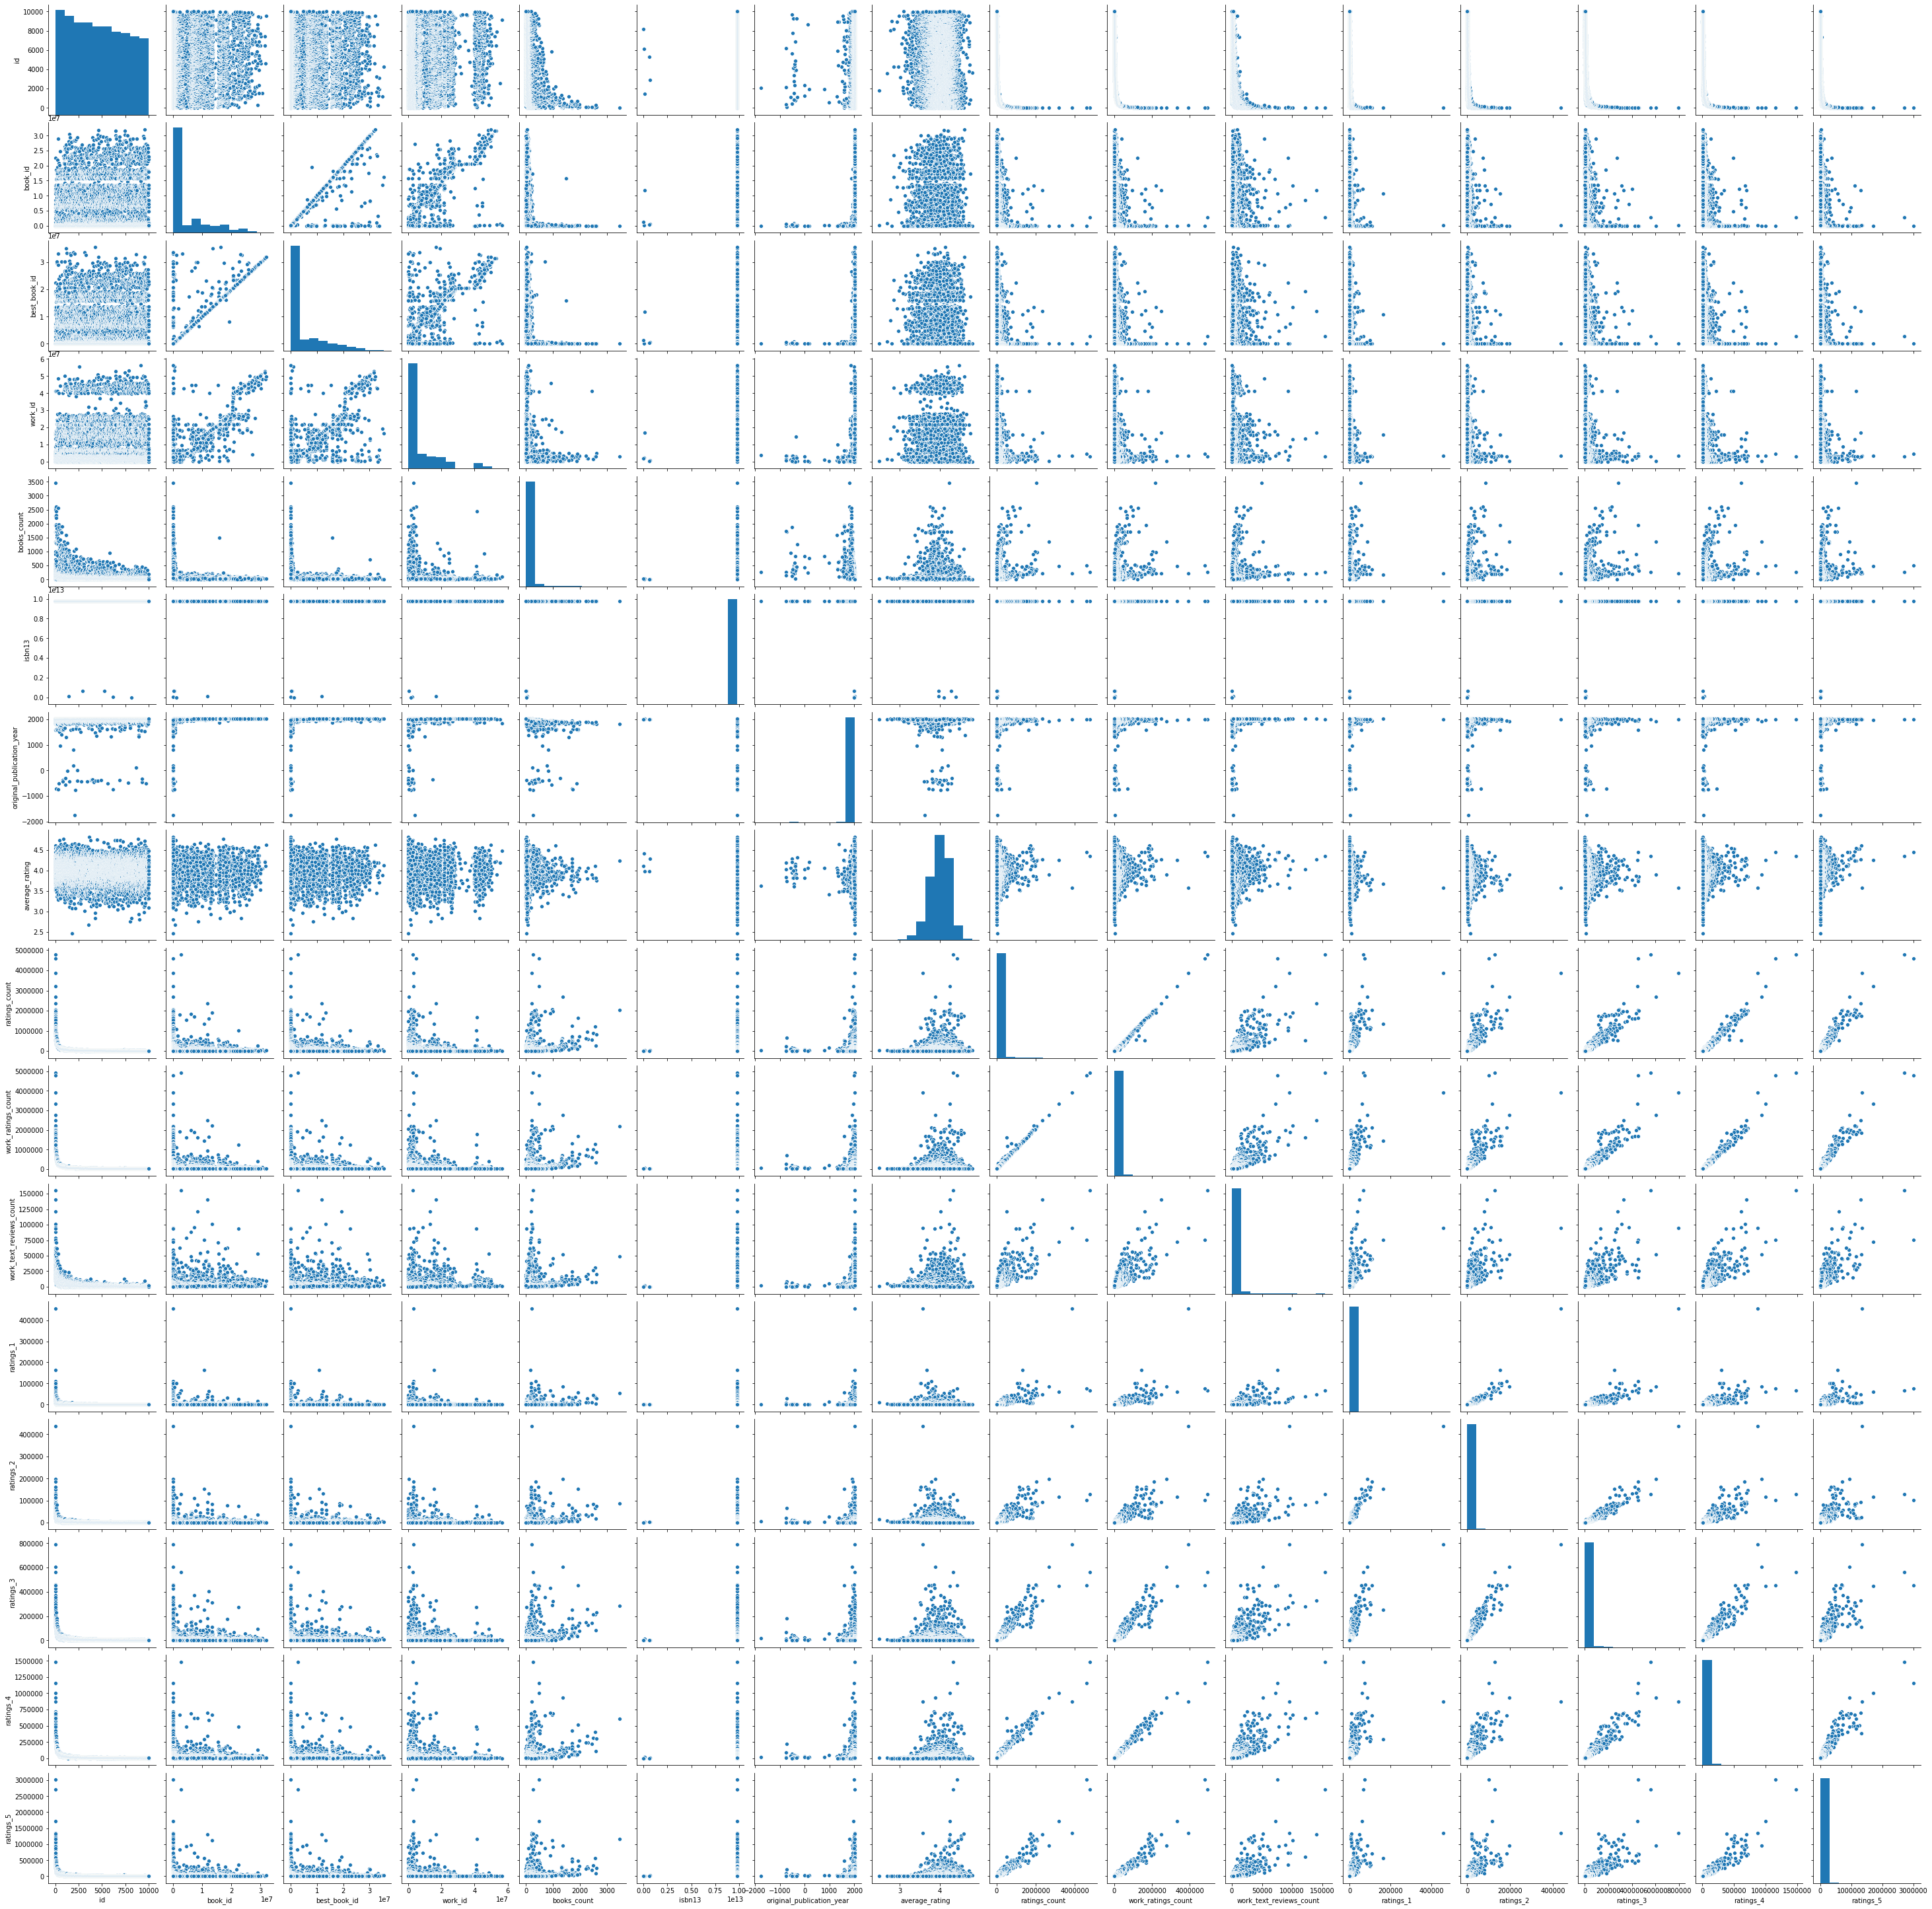

In [49]:
sns.pairplot(books.select_dtypes(include=['number']))

# display the plot
plt.show()

In [19]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [20]:
print(ratings.shape)
print(ratings.isnull().sum())

(981756, 3)
book_id    0
user_id    0
rating     0
dtype: int64


In [21]:
booktags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [22]:
print(booktags.shape)
print(booktags.isnull().sum())

(999912, 3)
goodreads_book_id    0
tag_id               0
count                0
dtype: int64


In [23]:
tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [24]:
print(tags.shape)
print(tags.isnull().sum())

(34252, 2)
tag_id      0
tag_name    0
dtype: int64


The rest of the files did not ave any null values so they were fine. Now lets take a look at the ratings and books dataframe and drop rows that can be considered as duplicates

In [10]:
print(ratings.shape)
ratings.drop_duplicates(subset =["user_id","book_id"], 
                     keep = False, inplace = True) 
print(ratings.shape)

(981756, 3)
(977269, 3)


In [11]:
print(books.shape)
books.drop_duplicates(subset='original_title',keep=False,inplace=True)
print(books.shape)

(10000, 23)
(9151, 23)


As a result, we have removed 4487 entries from the ratings dataframe and 849 entries from the books dataframe as they were duplicates.

Now, lets merge these two dataframes together. It might be interesting to see what insights we can gain b exploring this joint dataframe. 

In [25]:
ratings_by_users = pd.merge(books,ratings)
ratings_by_users = ratings_by_users[['book_id', 'original_title','user_id','rating']]
ratings_by_users.dropna(inplace=True)
ratings_by_users.head()

,book_id,original_title,user_id,rating
0,3,Harry Potter and the Philosopher's Stone,314,3
1,3,Harry Potter and the Philosopher's Stone,588,1
2,3,Harry Potter and the Philosopher's Stone,2077,2
3,3,Harry Potter and the Philosopher's Stone,2487,3
4,3,Harry Potter and the Philosopher's Stone,2900,3


Here we can see the bookid, the title of the book, the userid of a user and the rating that the user has given the book. 

In [26]:
num_unique_books = ratings_by_users.original_title.nunique()
num_unique_users = ratings_by_users.user_id.nunique()

print("Number of unique books is ", num_unique_books)
print("Number of unique users is ", num_unique_users)

Number of unique books is  677
Number of unique users is  26034


We can see that there are 677 unique books and 26034 users. Lets go back to the cleaned up books dataframe and see if we can find the books with the most number of ratings. We will also take a look the books with the highest average rating.

In [28]:
pop10 = books.sort_values(by='ratings_count', ascending=False)
pop10 = pop10.head(10)
pop10 = pop10[['title', 'ratings_count', 'average_rating']]
pop10 = pop10.set_index('title')
pop10

,ratings_count,average_rating
title,,
"The Hunger Games (The Hunger Games, #1)",4780653,4.34
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4602479,4.44
"Twilight (Twilight, #1)",3866839,3.57
To Kill a Mockingbird,3198671,4.25
The Great Gatsby,2683664,3.89
The Fault in Our Stars,2346404,4.26
The Hobbit,2071616,4.25
The Catcher in the Rye,2044241,3.79
Pride and Prejudice,2035490,4.24


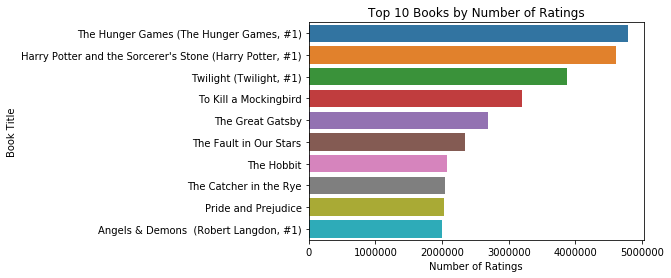

In [53]:
sns.barplot(x='ratings_count', y=pop10.index, data=pop10)

plt.title('Top 10 Books by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')

plt.show()

In [30]:
top_rated = books.sort_values('average_rating', ascending=False)
top10 = top_rated.head(10)
top_rated_books = top10[['title','average_rating', 'ratings_count']]
top_rated_books.set_index('title', inplace=True)
top_rated_books

,average_rating,ratings_count
title,,
The Complete Calvin and Hobbes,4.82,28900
"Words of Radiance (The Stormlight Archive, #2)",4.77,73572
Mark of the Lion Trilogy,4.76,9081
It's a Magical World: A Calvin and Hobbes Collection,4.75,22351
There's Treasure Everywhere: A Calvin and Hobbes Collection,4.74,16766
"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,4.73,16087
The Indispensable Calvin and Hobbes,4.73,14597
"Harry Potter Collection (Harry Potter, #1-6)",4.73,24618


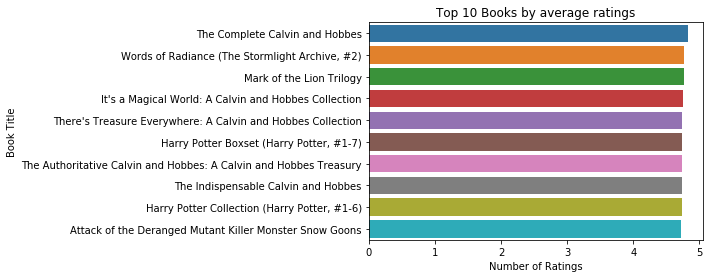

In [55]:
sns.barplot(x='average_rating', y=top_rated_books.index, data=top_rated_books)

plt.title('Top 10 Books by average ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')

plt.show()

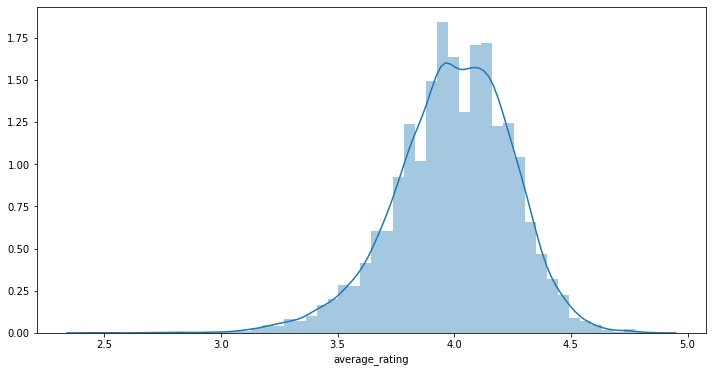

In [31]:
plt.figure(figsize=(12,6))
sns.distplot(a=books['average_rating'], kde=True)

Looking at the plot of the average ratings and the top 10 average ratings, we can see that the most common rating is between 3.5 and 4.5, which can be considered as pretty high.

It might also be interesting to merge the book tags and tags dataset for our EDA. We could try to find if the tags also contain genres that we can assign to books, which could help when we are building the recommendation engine.

In [32]:
all_tags=pd.merge(booktags,tags,left_on='tag_id',right_on='tag_id',how='inner')
all_tags.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [33]:
p = all_tags.groupby('tag_name').count()
p = p.sort_values(by='count', ascending=False)
p

,goodreads_book_id,tag_id,count
tag_name,,,
to-read,9983,9983,9983
favorites,9881,9881,9881
owned,9858,9858,9858
books-i-own,9799,9799,9799
currently-reading,9776,9776,9776
...,...,...,...
hs,1,1,1
hrabal,1,1,1
hq-manga,1,1,1


With 34252 rows, thats a lot of tags. It might be possible that some of these tags could contain genres, but it might require for us to either manually check the tag_names for relevant genres or hardcode a list of genres that we can try to match with the tag names. For now, lets take a look at the top 20 tags by their count.  

In [34]:
tags_by_count = p.sort_values('count', ascending=False)
top_20_tags = tags_by_count.head(20)
top_tags = top_20_tags[['count']]
top_tags

,count
tag_name,
to-read,9983
favorites,9881
owned,9858
books-i-own,9799
currently-reading,9776
library,9415
owned-books,9221
fiction,9097
to-buy,8692


As you can see, fiction as a genre is included in the tags, but it is the only one in the top twenty tags by count. So we can't rely on number of counts as a way to identify the genres. Another thing of note are the tags 'owned', 'books-i-own', 'owned-books', 'i-own'. All these tags seemily mean the same thing, books owned by a particular user, but they have different counts. This could mean that there are many redundant tags which could mean the same thing but have different values and it will be hard to identify the most relevant tag that we can use. This could apply to the genres too. There might be another tag 'fict' which could be short for fiction. This leads to a whole other problem where we might have to compare against other similar tags to find the actual amount of genres. This is too much for the scope of this project and might have to be revisited.

As of now, we have established that we can't quite make a recommendation system based on the genre of the book as there is no genre and we would have to manually checks the tagnames against a hardcoded list of genres. So we will stick with using a recommendation system based on the book title, the user and the rating.

### KNN recommendation model

For this portion, we will be attempting to make a recommendation system on the books and ratings dataset by using KNN. We will be merging the books and ratings dataset files and going from there. This idea was inspired by the post on this website https://www.analyticsvidhya.com/blog/2021/06/build-book-recommendation-system-unsupervised-learning-project/

In [35]:
book_ratings = pd.merge(books, ratings, how='left', left_on=['id'], right_on=['book_id'])
book_ratings = book_ratings[['id','original_title', 'user_id', 'rating']]
book_ratings = book_ratings.rename(columns = {'id':'book_id'})
book_ratings.dropna(inplace=True)
book_ratings.head()

,book_id,original_title,user_id,rating
0,1,The Hunger Games,314,5
1,1,The Hunger Games,439,3
2,1,The Hunger Games,588,5
3,1,The Hunger Games,1169,4
4,1,The Hunger Games,1185,4


In [36]:
book_ratings.describe()

,book_id,user_id,rating
count,775418.000000,775418.000000,775418.000000
mean,4682.216613,25130.946328,3.852285
std,2875.330180,15232.794397,0.981049
min,1.000000,1.000000,1.000000
25%,2147.000000,11840.000000,3.000000
50%,4539.000000,24228.500000,4.000000
75%,7112.000000,38035.000000,5.000000
max,9999.000000,53424.000000,5.000000


Lets creates a pivot table from the "book_ratings" DataFrame, where each row corresponds to a unique book ID, each column corresponds to a unique user ID, and the cell values represent the ratings that each user gave to each book. 

In [37]:
knn_ratings = book_ratings.pivot_table(index='book_id',columns='user_id',values='rating').fillna(0)
knn_ratings.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
knn_ratings.shape

(7860, 50768)

Using the pivot table from above, let's creates a sparse matrix from the "knn_ratings" DataFrame using the Compressed Sparse Row (CSR) format. A sparse matrix is a matrix that has a large number of zero values, and in this case, it represents the user ratings for each book in the "knn_ratings" DataFrame. We will be using the CSR matrix function from scipy. This creates a matrix representation that is more efficient for storing and manipulating sparse data than a dense matrix. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)

In [56]:
sparse_matrix = csr_matrix(knn_ratings.values)

Now we can use a Nearest Neighbors model on the sparse matrix to find similar items or users based on their ratings. In the case of a book recommendation system, you can use the Nearest Neighbors algorithm to find the k-nearest neighbors of a given book (or user) based on their ratings. This can be achieved by creating a Nearest Neighbors model and fitting it to the sparse matrix. (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html)

In [40]:
knn_model = NearestNeighbors(metric='cosine', algorithm = 'brute')
knn_model.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

Once we built the model, lets works on our recommendation function that will take in a book title and return a certain number of recommend books based on similar user rating. We will first start with some helper functions that gets the bookid and the book title. 

In [41]:
def get_id(book_title):
    title_id = book_ratings.loc[book_ratings['original_title'] == book_title]
    return title_id['book_id'].iloc[0]

def get_title(book_id):
    title = book_ratings.loc[book_ratings['book_id'] == book_id]
    return title['original_title'].iloc[0]

print(get_id("The Hunger Games"))
print(get_title(1))

1
The Hunger Games


Now we can focus on our get_book_recommendations() function. This function takes in two parameters, a book_title and a parameter k and returns a list of k recommended books(k by default is set to 10).
This method retrieves the ratings for the given book from the "knn_ratings" pivot table and stores them in a variable. It then uses the "kneighbors" method of the "knn_model" Nearest Neighbors model to find the k+1 nearest neighbors of the given book, based on the ratings in the variable created above. The IDs of the k+1 nearest neighbors from the "knn_ratings" pivot table are stored in another variable, which is then used by the get_title helper function from above to store the title of the books. In the end we return the list of recommended books. 

In [42]:
def get_book_recommendations(book_title, k=10):
    book_id = get_id(book_title)
    temp_ratings = knn_ratings.loc[book_id]

    distances, indices = knn_model.kneighbors(temp_ratings.values.reshape(1, -1), n_neighbors=k+1)

    similar_book_ids = [knn_ratings.index[i] for i in indices.flatten()]
    similar_book_titles = [get_title(book_id) for book_id in similar_book_ids]
    similar_book_titles.remove(book_title)
    
    return similar_book_titles

Now lets try to test the function on certain book titles

In [45]:
book_title1 = 'The Hunger Games'
recommendations = get_book_recommendations(book_title1)
print(f"Recommended books after reading {book_title1}:")
for i, book_title in enumerate(recommendations):
    print(f"{i+1}. {book_title}")

Recommended books after reading The Hunger Games:
1. Catching Fire
2. The Help
3. Harry Potter and the Philosopher's Stone
4. Mockingjay
5. Twilight
6. The Secret Garden
7. The Great Gatsby
8. Män som hatar kvinnor
9. Angels & Demons 
10. The Lion, the Witch and the Wardrobe


In [46]:
book_title2 = 'The Hobbit'
recommendations = get_book_recommendations(book_title2)
print(f"Recommended books after reading {book_title2}:")
for i, book_title in enumerate(recommendations):
    print(f"{i+1}. {book_title}")

Recommended books after reading The Hobbit:
1. The Hobbit and The Lord of the Rings
2. The Stand
3. Divergent
4. V for Vendetta
5. Gone Girl
6. A Game of Thrones
7. Watchmen
8. City of Bones
9. Red Dragon
10. The Giver


In [47]:
random_book_title = book_ratings['original_title'].sample().iloc[0]
recommendations = get_book_recommendations(random_book_title)
print(f"Recommended books after reading {random_book_title}:")
for i, book_title in enumerate(recommendations):
    print(f"{i+1}. {book_title}")

Recommended books after reading The Sacrilege: The Antichrist Takes the Throne:
1. The Remnant: On the Brink of Armageddon
2. The Mark: The Beast Rules the World
3. The Indwelling: The Beast Takes Possession
4. Assassins : Assignment: Jerusalem, Target: Antichrist
5. Apollyon: The Destroyer Is Unleashed
6. Armageddon: The Cosmic Battle of the Ages
7. Soul Harvest: The World Takes Sides
8. Nicolae: The Rise of Antichrist
9. Tribulation Force: The Continuing Drama of Those Left Behind
10. Glorious Appearing: The End of Days


We are able to successfully retrieve recommendations from a book title based on their rating patterns by utilizing the csr_matrix and knn model. I was unable to implement a training and testing dataset to test the accuracy of this model. This was mostly because, unlike in supervised learning, it is difficult to establish a "correct" set of recommendations for a given book. In other words, there's no objective or definitive list of books that are similar to a given book, and different people may have different opinions on what books are similar. As they are often subjective and dependent on individual preferences, there is no right answer for which we can compare our model to. I started researching possible ways to test this model, but given the time constraints, was unable to implement them in a meaningful way. However, I do believe this is a good first step and that future implementations would be looking at checking the validity and accuracy of this model.

Another further improvement, could be the possible exploration in the tag-names files. As mentioned before, it is possible that genre names are included in the tags. We just need to improvise how we can identify the genres from the tags. I had already mentioned, we could hardcode a list of the most relevant genres from other sources and try to compare it with the tags list. If we were to derive a list of genres from the tags, we could then see if we can combine it with the book ratings table. This could improve the recommendations as they would be now based on ratings and genres, instead of just user ratings.  

### Conclusion

Based on the KNN model and get_book_recommendations function we developed, we were able to generate 10 recommendations for each of the three test book titles. Although we were unable to test the accuracy of the model, we can still draw some conclusions from this work.

First, we were able to preprocess the dataset and create a sparse matrix representation that was suitable for the KNN algorithm. The KNN model was then fitted on this data, allowing it to identify books with similar rating patterns.

The get_book_recommendations function utilized the KNN model to identify similar books to a given input title based on their rating patterns. Although the accuracy of the model was not measured, the recommendations generated by the function provide a starting point for further exploration of similar books.

Overall, the KNN model and get_book_recommendations function have the potential to be useful tools for book recommendation systems. However, further testing and evaluation would be necessary to fully assess their accuracy and effectiveness.